<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/GYMBUDDY-IA/MLV1_GYMBUDDY_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
dataframe = pd.read_csv("/content/datagpt2.csv")

In [3]:
dataframe.head()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente
0,Maria,28,F,True,1.65,55,Mesomorfo,False
1,João,35,M,True,1.80,85,Endomorfo,False
2,Ana,22,F,True,1.70,60,Ectomorfo,True
3,Pedro,30,M,False,1.75,70,Mesomorfo,False
4,Carolina,40,F,True,1.60,70,Endomorfo,False


In [4]:
dataframe.tail()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente
379,Otávio,42,M,True,1.81,79,Mesomorfo,False
380,Paula,21,F,True,1.66,58,Ectomorfo,False
381,Ricardo,36,M,False,1.79,76,Endomorfo,True
382,Sofia,24,F,True,1.70,62,Mesomorfo,False
383,Tiago,29,M,True,1.83,81,Endomorfo,False


In [5]:
dataframe.shape

(384, 8)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nome           384 non-null    object 
 1   Idade          384 non-null    int64  
 2   Sexo           384 non-null    object 
 3   Treina         384 non-null    bool   
 4   Altura         384 non-null    float64
 5   Peso           384 non-null    int64  
 6   Tipo de Corpo  384 non-null    object 
 7   Deficiente     384 non-null    bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 18.9+ KB


In [7]:
dataframe.columns.values

array(['Nome', 'Idade', 'Sexo', 'Treina', 'Altura', 'Peso',
       'Tipo de Corpo', 'Deficiente'], dtype=object)

In [8]:
dataframe.dtypes

Nome              object
Idade              int64
Sexo              object
Treina              bool
Altura           float64
Peso               int64
Tipo de Corpo     object
Deficiente          bool
dtype: object

In [9]:
dataframe.isnull().sum()

Nome             0
Idade            0
Sexo             0
Treina           0
Altura           0
Peso             0
Tipo de Corpo    0
Deficiente       0
dtype: int64

In [10]:
#dataframe = pd.get_dummies(dataframe, columns=['sexo'])

KeyError: "None of [Index(['sexo'], dtype='object')] are in the [columns]"

In [11]:
dataframe['imc'] = dataframe['Peso'] / (dataframe['Altura'] ** 2)

dataframe['sobrepeso'] = dataframe['imc'] > 30
dataframe['sobrepeso'] = dataframe['sobrepeso'] #Posso passar um map para mudar o valor padrao booleano, mas vou deixar True e False

In [12]:
dataframe.head()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso
0,Maria,28,F,True,1.65,55,Mesomorfo,False,20.202020,False
1,João,35,M,True,1.80,85,Endomorfo,False,26.234568,False
2,Ana,22,F,True,1.70,60,Ectomorfo,True,20.761246,False
3,Pedro,30,M,False,1.75,70,Mesomorfo,False,22.857143,False
4,Carolina,40,F,True,1.60,70,Endomorfo,False,27.343750,False


##Analise dos Dados

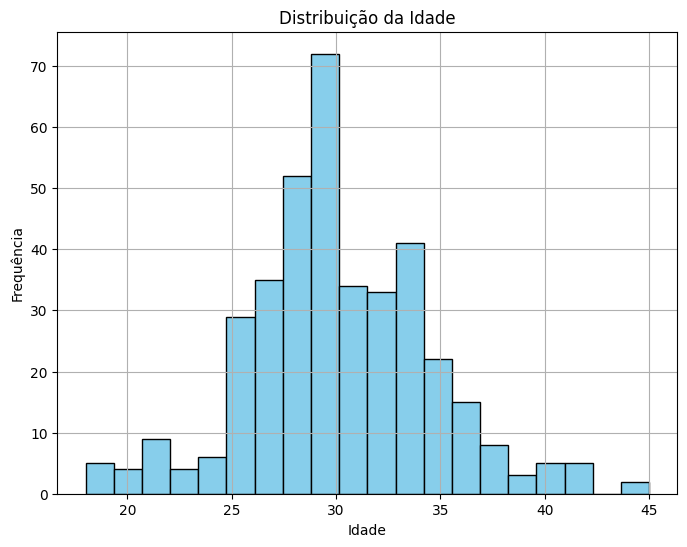

In [13]:
# Histograma da idade
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Idade'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [ ]:
# Histograma da altura
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Altura'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição da Altura')
plt.xlabel('Altura (m)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Histograma do peso
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Peso'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuição do Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Gráfico de dispersão entre altura e peso
plt.figure(figsize=(8, 6))
plt.scatter(dataframe['Altura'], dataframe['Peso'], color='orange', alpha=0.5)
plt.title('Dispersão entre Altura e Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot do IMC por tipo de corpo
plt.figure(figsize=(8, 6))
plt.boxplot([dataframe[dataframe['Tipo de Corpo'] == 'Mesomorfo']['imc'],
             dataframe[dataframe['Tipo de Corpo'] == 'Endomorfo']['imc'],
             dataframe[dataframe['Tipo de Corpo'] == 'Ectomorfo']['imc']],
            labels=['Mesomorfo', 'Endomorfo', 'Ectomorfo'])
plt.title('Boxplot do IMC por Tipo de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

In [ ]:
# Gráfico de barras da distribuição de tipos de corpo
plt.figure(figsize=(8, 6))
dataframe['Tipo de Corpo'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribuição de Tipos de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

In [ ]:
# Gráfico de pizza da distribuição de sexo
plt.figure(figsize=(8, 6))
dataframe['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribuição de Sexo')
plt.ylabel('')
plt.legend(['Feminino', 'Masculino'], loc='best')
plt.show()

In [ ]:
dataframe['Deficiente'].value_counts().plot(kind='bar')
plt.title('Distribuição de Frequência por Deficiência')
plt.xlabel('Deficiência')
plt.ylabel('Frequência')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dataframe['Nome'], y=dataframe['imc'], palette='viridis')
plt.title('IMC por Pessoa')
plt.xlabel('Pessoa')
plt.ylabel('IMC')
plt.ylim(15, 30)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=dataframe['Tipo de Corpo'], hue=dataframe['Sexo'], palette='pastel')
plt.title('Tipo de Corpo por Gênero')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Contagem')
plt.grid(True)
plt.legend(title='Sexo', loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataframe['Idade'], y=dataframe['imc'], s=100, color='blue', alpha=0.8)
plt.title('IMC vs Idade')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataframe['Peso'], y=dataframe['imc'], s=100, color='green', alpha=0.8)
plt.title('IMC vs Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

In [ ]:
# Gráfico de dispersão interativo com zoom e seleção de dados
fig = px.scatter(dataframe, x='Sexo', y='imc', color='Tipo de Corpo', size='Idade', hover_name='Nome', title='Comparação de IMC por Sexo')
fig.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=dataframe['Treina'], y=dataframe['imc'], palette='dark')
plt.title('IMC por Treino')
plt.xlabel('Treina?')
plt.ylabel('IMC')
plt.grid(True)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataframe['Tipo de Corpo'], y=dataframe['Altura'], palette='Set1')
plt.title('Altura por Tipo de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

## Tratamento dos dados

In [14]:
dataframe.dtypes

Nome              object
Idade              int64
Sexo              object
Treina              bool
Altura           float64
Peso               int64
Tipo de Corpo     object
Deficiente          bool
imc              float64
sobrepeso           bool
dtype: object

In [15]:
# Convertendo variáveis categóricas em numéricas
dataframe['Sexo'] = dataframe['Sexo'].replace({'F': 0, 'M': 1})
dataframe['Treina'] = dataframe['Treina'].astype(int)
dataframe['Deficiente'] = dataframe['Deficiente'].astype(int)
dataframe['Tipo de Corpo'] = dataframe['Tipo de Corpo'].map({'Mesomorfo': 0, 'Ectomorfo': 1, 'Endomorfo': 2})


In [20]:
dataframe.tail()

,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso
379,42,1,1,1.81,79,0,0,24.114038,False
380,21,0,1,1.66,58,1,0,21.048048,False
381,36,1,0,1.79,76,2,1,23.719609,False
382,24,0,1,1.70,62,0,0,21.453287,False
383,29,1,1,1.83,81,2,0,24.187046,False


In [17]:
# Removendo a coluna 'Nome'
df_sn = dataframe.drop(columns=['Nome'], inplace=True)

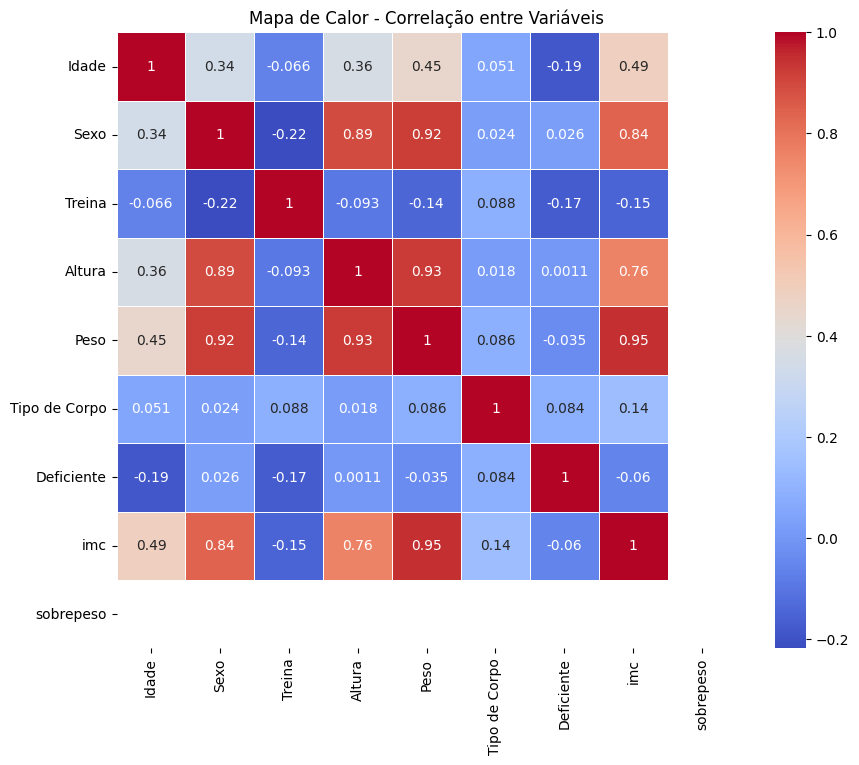

In [19]:
# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

## Treinamento do Modelo

In [ ]:
X = dataframe.drop(columns=['nome', 'tipo_corpo', 'sobrepeso', 'imc'])
y_tipo_corpo = dataframe['tipo_corpo']
y_obeso = dataframe['sobrepeso']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_tipo_corpo, test_size=0.2, random_state=42)


In [ ]:
clf_tipo_corpo = RandomForestClassifier(random_state=42)
clf_tipo_corpo.fit(X_train, y_train)

In [ ]:
y_pred_tipo_corpo = clf_tipo_corpo.predict(X_test)

In [ ]:
accuracy_tipo_corpo = accuracy_score(y_test, y_pred_tipo_corpo)
print("Acurácia do modelo de classificação do tipo de corpo:", accuracy_tipo_corpo)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

In [ ]:
print(classification_report(y_test, predicted_y))

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, predict_y))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()